In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
from scipy.ndimage import rotate

In [2]:
def view(img, x=7, y=7, _cmap='autumn_r'):
    plt.figure(figsize=(x, y))
    plt.imshow(img, cmap=_cmap)
    plt.show()
    
    
def region_of_interest(img, vertices):
    mask             = np.zeros_like(img)
    match_mask_color = 255
    
    cv2.fillPoly(mask, vertices, match_mask_color)
   
    masked_image = cv2.bitwise_and(img, mask)
    
    return masked_image
    
    
def discrete_radon_transform(img, steps):
    # crate matrix
    w, h = img.shape
    zero = np.zeros((w, steps), dtype='float64')
    # sum and roatate
    for s in range(steps):
        rotation = rotate(img, s, reshape=False).astype('float64')
        # cut image
        cut = (rotation.shape[1] - rotation.shape[0]) / 2
        hm  = int(h - cut)
        hl  = int(cut)
        rotation = rotation[:,hl:hm]
        # sum
        zero[:, s] = np.sum(rotation, axis=0)
    # rotate image
#     zero = rotate(zero, 180, reshape=False).astype('float64')
    # resize to original
    res = cv2.resize(zero.T, dsize=(img.shape), interpolation=cv2.INTER_CUBIC)
    res = res.T
    
    return res

In [1]:
image = cv2.imread('./Data/1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray  = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY)

canny = cv2.Canny(gray, 100, 250);
view(canny, _cmap='gray')

h, w, _ = image.shape

region_of_VP = [
    (0, h),
    (w/2, h/2),
    (w, h)
]

cropped_image = region_of_interest(canny, np.array([region_of_VP], np.int32))
view(cropped_image, _cmap='gray')

radon_image = discrete_radon_transform(cropped_image, 180)
view(radon_image, _cmap='jet')

radon_image_int = radon_image.astype('int')
view(radon_image_int, _cmap='jet')

radon_reshape = sorted(np.unique(radon_image_int.reshape(-1)), reverse=True)

points = []
for i in radon_reshape[0:1000]:
    result = np.where(radon_image_int == i)
    points.append([result[1][0], result[0][0]])
    
    
img2 = image.copy()
for point in points:
    img2 = cv2.drawMarker(img2, (point[0], point[1]), (0, 255, 255), cv2.MARKER_CROSS, 5, 5, 1)
    
view(img2)

NameError: name 'cv2' is not defined

In [62]:
from sklearn import cluster

In [63]:
def cluster_intersects(points):
    db = cluster.DBSCAN(eps=5, min_samples=1).fit(np.array(points))
    labels = db.labels_
    biggest_cluster = np.argmax(np.bincount(labels))
    vp = tuple(np.mean(np.array(points)[labels==biggest_cluster], axis=0).astype('int'))
    return vp

In [68]:
def draw_vp_of_clustering(img, points):
    new_img = img.copy()
    vp = cluster_intersects(points)
    new_img = cv2.drawMarker(new_img, (vp), (0, 255, 255), cv2.MARKER_CROSS, 5, 5, 1)
    print(vp)
    return new_img

(1246, 1364)


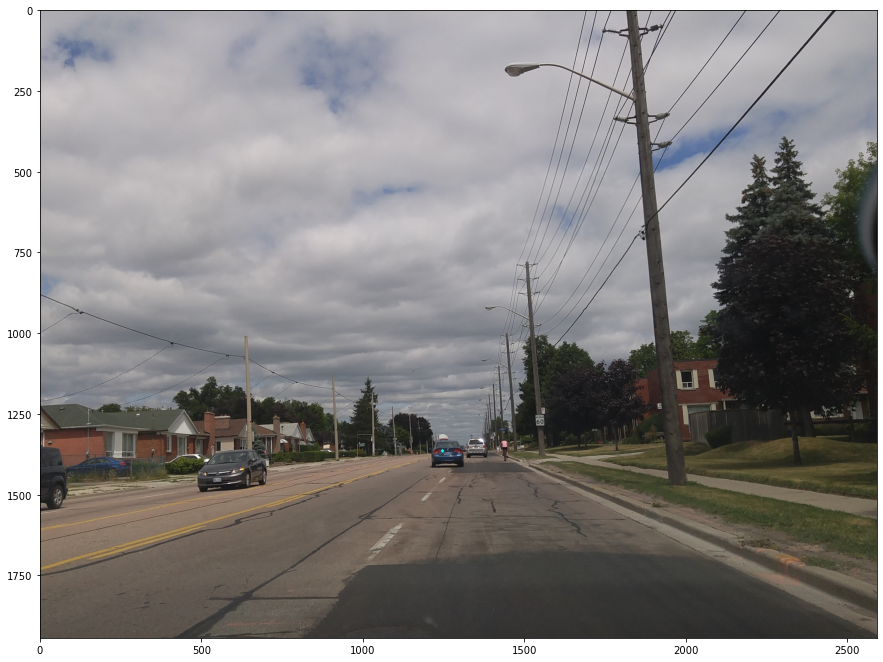

In [69]:
view(draw_vp_of_clustering(image, points), 15, 15)